**Simple example of predicting bounding boxes in an image.**

- Load model
- Predict boxes in a model
- Use NMS to remove extra boxes
- Show results

## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
# use %autoreload command to reload all libraries

In [2]:
from IPython.core.debugger import set_trace
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
import sys
import os
sys_paths = ['../'] # Adding yolov3_pytorch to python paths
for p in sys_paths:
    p = os.path.abspath(p)
    if p not in sys.path:
        sys.path.append(p)

In [4]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from matplotlib import patches, patheffects

In [5]:
print("Pytorch: {}".format(torch.__version__))

Pytorch: 0.4.0


In [6]:
from yolov3_pytorch.utils import *
from yolov3_pytorch.yolov3 import *
from yolov3_pytorch.yolov3_tiny import *

In [7]:
imgfile = "../tests/mocks/dog.jpg"

In [8]:
sz = 416
img_org = Image.open(imgfile).convert('RGB')
img_resized = img_org.resize((sz, sz))
img_torch = image2torch(img_resized)

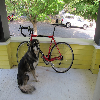

In [38]:
img_org.resize((100,100))

In [10]:
class_names = ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Using Yolov3Tiny

In [11]:
model = Yolov3Tiny(num_classes=80)
model.load_state_dict(torch.load('../data/models/yolov3_tiny_coco_01.h5'))

In [12]:
all_boxes = model.predict_img(img_torch, conf_thresh=0.2)[0]
len(all_boxes)

11

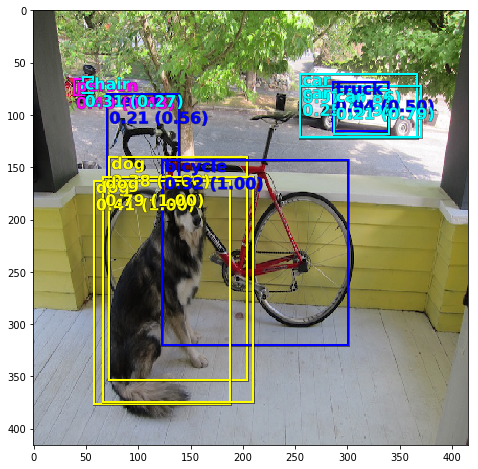

In [13]:
plot_img_detections(img_resized, all_boxes, figsize=(8,8), class_names=class_names)

In [14]:
boxes = nms(all_boxes, 0.4)
len(boxes)

7

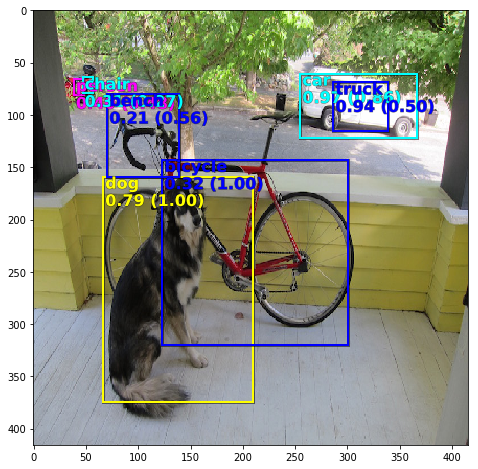

In [15]:
plot_img_detections(img_resized, boxes, figsize=(8,8), class_names=class_names)

# Using Yolov3 Full Model

In [16]:
model = Yolov3(num_classes=80)
model.load_state_dict(torch.load('../data/models/yolov3_coco_01.h5'))

In [17]:
all_boxes = model.predict_img(img_torch, conf_thresh=0.2)[0]
len(all_boxes)

17

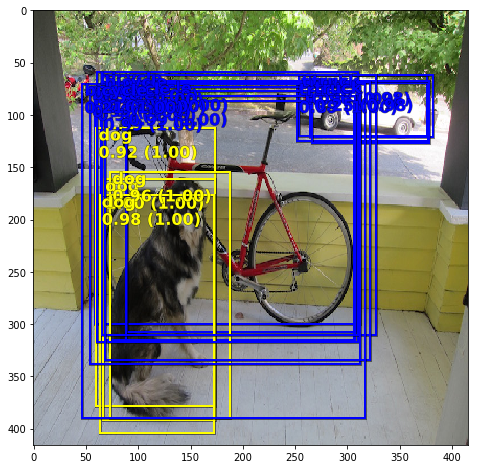

In [18]:
plot_img_detections(img_resized, all_boxes, figsize=(8,8), class_names=class_names)

In [19]:
boxes = nms(all_boxes, 0.4)
len(boxes)

3

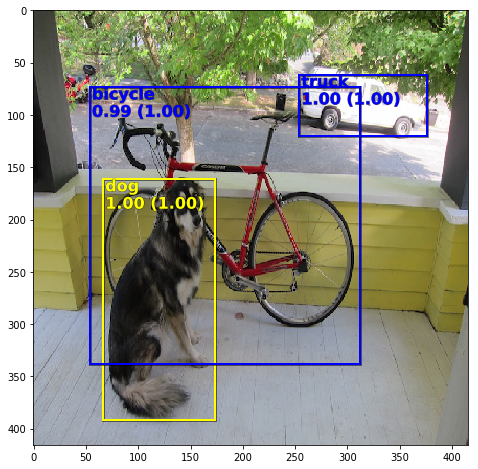

In [20]:
plot_img_detections(img_resized, boxes, figsize=(8,8), class_names=class_names)

### Using Different Parameters

27

6

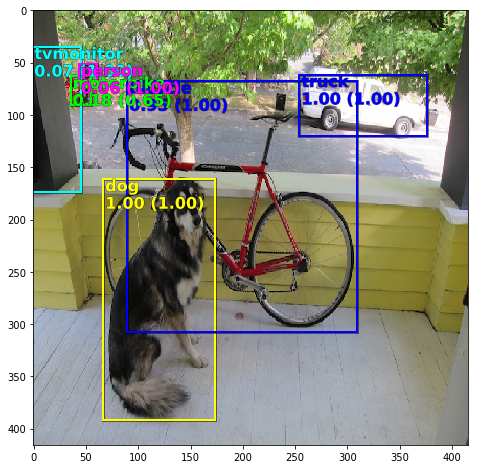

In [36]:
all_boxes = model.predict_img(img_torch, conf_thresh=.05)[0]
len(all_boxes)
boxes = nms(all_boxes, 0.2)
len(boxes)
plot_img_detections(img_resized, boxes, figsize=(8,8), class_names=class_names)